In [ ]:
pip install mlxtend --upgrade --no-deps

Requirement already up-to-date: mlxtend in /usr/local/lib/python3.7/dist-packages (0.18.0)


In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules,fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import csv

# Apriori On chess

In [ ]:
items=[]
with open('/content/chess.dat', 'r') as file:
    dataset = csv.reader(file, delimiter=' ')
    for row in dataset:
        temp=[element for element in row]
        temp= temp[:-1]
        items.append(temp)

In [ ]:

apc_times = list()
apc_elements = list()
minsupport = .6
while minsupport <=1:
  start = time.process_time()
  te = TransactionEncoder()
  te_ary = te.fit(items).transform(items)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  result= apriori(df, min_support= minsupport, use_colnames=True)
  apc_elements.append(minsupport)    
  end = time.process_time()
  apc_times.append(end-start)
  print (result)
  # total time taken
  print(f"Runtime of the program is {end - start}")
  minsupport +=.05

         support                                           itemsets
0       0.666145                                               (11)
1       0.633917                                               (15)
2       0.782228                                               (17)
3       0.619524                                               (19)
4       0.696183                                               (21)
...          ...                                                ...
254939  0.600125  (62, 29, 34, 60, 66, 5, 58, 48, 56, 9, 3, 52, ...
254940  0.607009  (62, 29, 34, 7, 60, 66, 58, 48, 56, 9, 3, 52, ...
254941  0.601377  (62, 29, 34, 7, 60, 66, 5, 58, 56, 9, 3, 52, 4...
254942  0.611702  (62, 29, 7, 60, 66, 5, 42, 58, 48, 56, 34, 52,...
254943  0.635795  (62, 29, 7, 60, 66, 5, 58, 48, 56, 9, 34, 52, ...

[254944 rows x 2 columns]
Runtime of the program is 32.93123393399998
         support                                           itemsets
0       0.666145                             

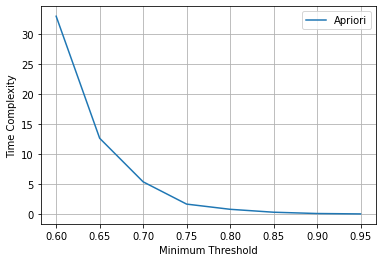

In [ ]:
plt.xlabel('Minimum Threshold')
plt.ylabel('Time Complexity')
plt.plot(apc_elements, apc_times, label ='Apriori')
plt.grid()
plt.legend()
plt.savefig('AprioriChess.pdf',bbox_inches='tight')
plt.show()


# FP-Growth on Chess

In [ ]:
items=[]
with open('/content/chess.dat', 'r') as file:
    dataset = csv.reader(file, delimiter=' ')
    for row in dataset:
        temp=[element for element in row]
        items.append(temp)

In [ ]:

fpc_times = list()
fpc_elements = list()
minsupport = .6
while minsupport <=1:
  start = time.process_time()
  te = TransactionEncoder()
  te_ary = te.fit(items).transform(items)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  result= fpgrowth(df, min_support= minsupport, use_colnames=True)
  fpc_elements.append(minsupport)    
  end = time.process_time()
  fpc_times.append(end-start)
  print (result)
  # total time taken
  print(f"Runtime of the program is {end - start}")
  minsupport +=.05

         support               itemsets
0       1.000000                     ()
1       0.999687                   (58)
2       0.996558                   (52)
3       0.995307                   (29)
4       0.991865                   (40)
...          ...                    ...
509884  0.600751     (, 62, 50, 58, 40)
509885  0.600751      (, 62, 50, 7, 58)
509886  0.600751      (, 62, 50, 7, 40)
509887  0.600751    (62, 50, 7, 58, 40)
509888  0.600751  (, 62, 50, 7, 58, 40)

[509889 rows x 2 columns]
Runtime of the program is 10.350887645
         support        itemsets
0       1.000000              ()
1       0.999687            (58)
2       0.996558            (52)
3       0.995307            (29)
4       0.991865            (40)
...          ...             ...
222474  0.653630      (, 60, 11)
222475  0.653317    (60, 11, 58)
222476  0.650188    (60, 11, 52)
222477  0.653317  (, 60, 11, 58)
222478  0.650188  (, 60, 11, 52)

[222479 rows x 2 columns]
Runtime of the program is 4.888

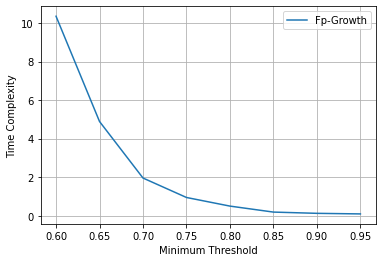

In [ ]:
plt.xlabel('Minimum Threshold')
plt.ylabel('Time Complexity')
plt.plot(fpc_elements, fpc_times, label ='Fp-Growth')
plt.grid()
plt.legend()
plt.savefig('FpgrowthChess.pdf',bbox_inches='tight')
plt.show()


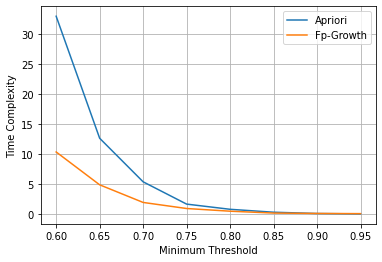

In [ ]:
plt.xlabel('Minimum Threshold')
plt.ylabel('Time Complexity')
plt.plot(apc_elements, apc_times, label ='Apriori')
plt.plot(fpc_elements, fpc_times, label ='Fp-Growth')
plt.grid()
plt.legend()
plt.savefig('chesscombine.pdf',bbox_inches='tight')
plt.show()





In [ ]:
data={"Apriori":apc_times,"Fp-Growth":fpc_times}
index = [0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95]
dataFrame = pd.DataFrame(data=data, index=index);

 
my_colors = ['lightseagreen','sandybrown']
# Draw a vertical bar chart

dataFrame.plot.bar(rot=15,color=my_colors);
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2))
plt.ylabel("Times Taken to Run The Algorithms")
plt.xlabel("Thresholds")
plt.savefig('Chess.pdf',bbox_inches='tight')

plt.show(block=True);

# Apriori on Kosarak

In [ ]:
items=[]
with open('/content/kosarak.dat', 'r') as file:
    dataset = csv.reader(file, delimiter=' ')
    for row in dataset:
        temp=[element for element in row]
        #temp= temp[:-1]
        items.append(temp)

In [ ]:
del items[200000:]

In [ ]:

apk_times = list()
apk_elements = list()
minsupport = .1
while minsupport <=.6:
  start = time.process_time()
  te = TransactionEncoder()
  te_ary = te.fit(items).transform(items)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  
  result= apriori(df, min_support= minsupport, use_colnames=True)
  end = time.process_time()
  apk_elements.append(minsupport)    
  
  apk_times.append(end-start)
  print (result)
  # total time taken
  print(f"Runtime of the program is {end - start}")
  minsupport +=.1

    support    itemsets
0  0.198790         (1)
1  0.365915        (11)
2  0.456225         (3)
3  0.607165         (6)
4  0.132615      (1, 6)
5  0.162610     (3, 11)
6  0.325245     (11, 6)
7  0.268345      (3, 6)
8  0.144350  (3, 11, 6)
Runtime of the program is 7.612210164000004
    support itemsets
0  0.365915     (11)
1  0.456225      (3)
2  0.607165      (6)
3  0.325245  (11, 6)
4  0.268345   (3, 6)
Runtime of the program is 7.492856254999992
    support itemsets
0  0.365915     (11)
1  0.456225      (3)
2  0.607165      (6)
3  0.325245  (11, 6)
Runtime of the program is 7.397690964000006
    support itemsets
0  0.456225      (3)
1  0.607165      (6)
Runtime of the program is 7.411035124999998
    support itemsets
0  0.607165      (6)
Runtime of the program is 7.332417019999994
    support itemsets
0  0.607165      (6)
Runtime of the program is 7.279322709999988


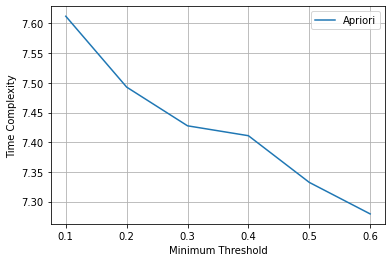

In [ ]:
plt.xlabel('Minimum Threshold')
plt.ylabel('Time Complexity')
plt.plot(apk_elements, apk_times, label ='Apriori')
plt.grid()
plt.legend()
plt.savefig('Apriorikosarak.pdf',bbox_inches='tight')
plt.show()


# FP-Growth on Kosarak

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules,fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import csv

In [ ]:
items=[]
with open('/content/kosarak.dat', 'r') as file:
    dataset = csv.reader(file, delimiter=' ')
    for row in dataset:
        temp=[element for element in row]
        items.append(temp)

In [ ]:
del items[200000:]

In [ ]:

fpk_times = list()
fpk_elements = list()
minsupport = .1
while minsupport <=.6:
  
  te = TransactionEncoder()
  te_ary = te.fit(items).transform(items)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  start = time.process_time()
  result= fpgrowth(df, min_support= minsupport, use_colnames=True)
  fpk_elements.append(minsupport)    
  end = time.process_time()
  fpk_times.append(end-start)
  print (result)
  # total time taken
  print(f"Runtime of the program is {end - start}")
  minsupport +=.1

    support    itemsets
0  0.456225         (3)
1  0.198790         (1)
2  0.607165         (6)
3  0.365915        (11)
4  0.268345      (3, 6)
5  0.132615      (1, 6)
6  0.325245     (11, 6)
7  0.162610     (3, 11)
8  0.144350  (3, 11, 6)
Runtime of the program is 7.544084037000005
    support itemsets
0  0.456225      (3)
1  0.607165      (6)
2  0.365915     (11)
3  0.268345   (3, 6)
4  0.325245  (11, 6)
Runtime of the program is 7.542767176000012
    support itemsets
0  0.456225      (3)
1  0.607165      (6)
2  0.365915     (11)
3  0.325245  (11, 6)
Runtime of the program is 7.537458122999993
    support itemsets
0  0.456225      (3)
1  0.607165      (6)
Runtime of the program is 7.496398278000015
    support itemsets
0  0.607165      (6)
Runtime of the program is 7.425130177999989
    support itemsets
0  0.607165      (6)
Runtime of the program is 7.434092456999991


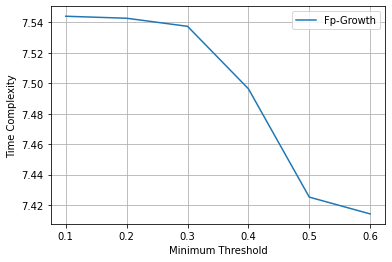

In [ ]:
plt.xlabel('Minimum Threshold')
plt.ylabel('Time Complexity')
plt.plot(fpk_elements, fpk_times, label ='Fp-Growth')
plt.grid()
plt.legend()
plt.savefig('fpgrowthkosarak.pdf',bbox_inches='tight')
plt.show()


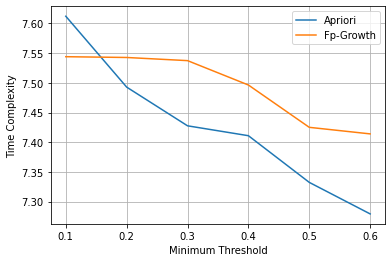

In [ ]:
plt.xlabel('Minimum Threshold')
plt.ylabel('Time Complexity')
plt.plot(apk_elements, apk_times, label ='Apriori')
plt.plot(fpk_elements, fpk_times, label ='Fp-Growth')
plt.grid()
plt.legend()
plt.savefig('kosarakcombine.pdf',bbox_inches='tight')
plt.show()

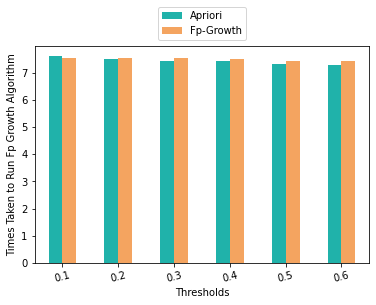

In [ ]:
data={"Apriori":apk_times,"Fp-Growth":fpk_times}
index = [0.1,0.2,0.3,0.4,0.5,0.6]
dataFrame = pd.DataFrame(data=data, index=index);

 
my_colors = ['lightseagreen','sandybrown']
# Draw a vertical bar chart

dataFrame.plot.bar(rot=15,color=my_colors);
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2))
plt.ylabel("Times Taken to Run Fp Growth Algorithm")
plt.xlabel("Thresholds")
plt.savefig('Kosarak.pdf',bbox_inches='tight')

plt.show(block=True);